# Music genre classification 
## By : Brahim ERRAJI

## Dataset Exploring

In [116]:
import librosa

In [117]:
import IPython.display as ipd

In [118]:
audio_path = 'genres/blues/blues.00001.wav'

In [119]:
ipd.Audio(audio_path)

In [120]:
x,sr = librosa.load(audio_path)

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

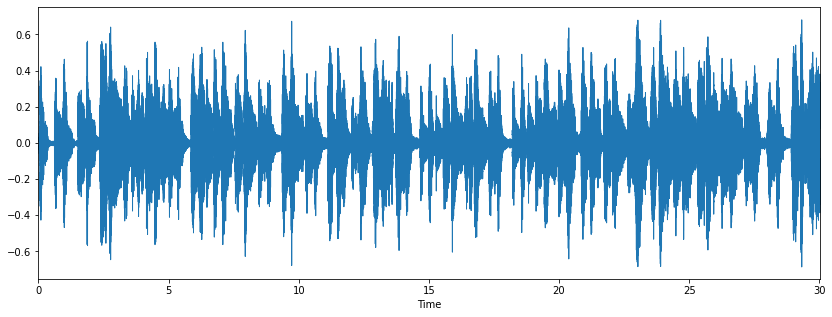

In [122]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

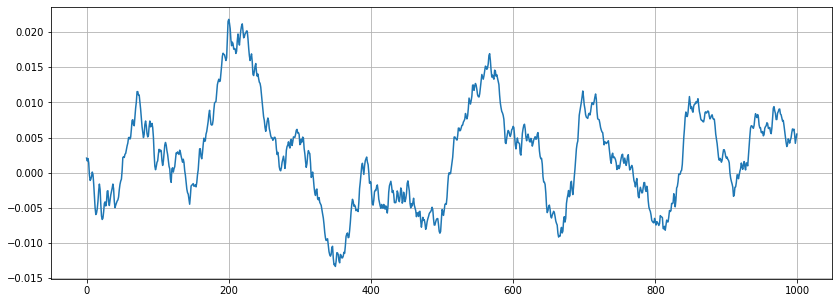

In [123]:
n0 = 8000
n1 = 9000
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

# Feature extraction from Audio signal


In [235]:
audio_path = 'genres/blues/blues.00001.wav'
x,sr = librosa.load(audio_path)

In [124]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]

In [125]:
spectral_centroids.mean()

1530.1766787460795

In [126]:
spectral_centroids.var()

375850.0736486866

In [127]:
chroma_stft = librosa.feature.chroma_stft(x,sr=sr)[0]

In [128]:
rms = librosa.feature.rms(x)

In [129]:
rms[0]

array([0.06771811, 0.10716628, 0.14316952, ..., 0.13760294, 0.1339183 ,
       0.12976366], dtype=float32)

In [130]:
spectral_bandwith = librosa.feature.spectral_bandwidth(x)

In [131]:
len(spectral_centroids)

1293

## Data Exploring

In [132]:
import pandas as pd

In [133]:
data = pd.read_csv('features_3_sec.csv')

The top 5 rows of the dataset

In [134]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


Informations about the dataset

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

## Correlation Matrix

In [136]:
mean_cols = [col for col in data.columns if 'mean' in col]

In [137]:
corr = data[mean_cols].corr()

In [138]:
import matplotlib.pyplot as plt

In [139]:
import seaborn as sns

In [140]:
import numpy as np

In [141]:
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))

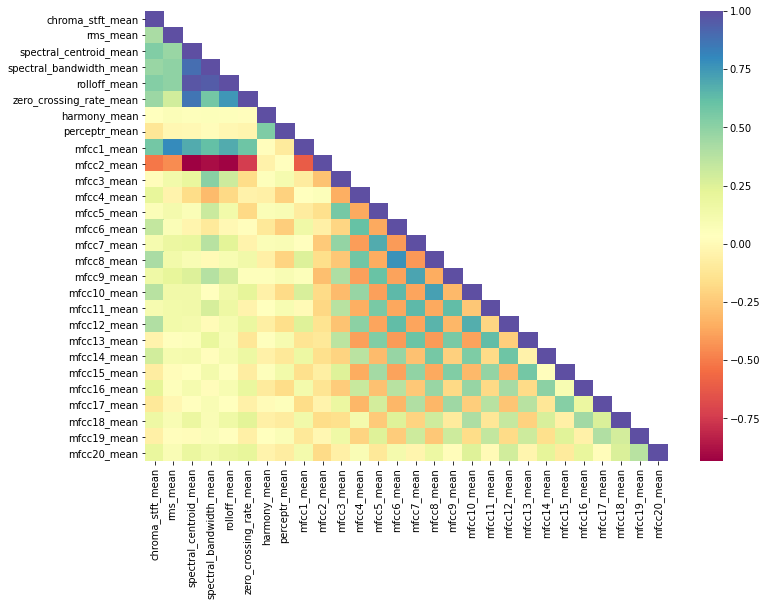

In [142]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
hmap = sns.heatmap( df_lt,ax = ax,cmap = 'Spectral')
plt.savefig('corrmatrix.png')

In [143]:
data['tempo']

0       129.199219
1       123.046875
2       123.046875
3       123.046875
4       123.046875
           ...    
9985    123.046875
9986     83.354335
9987    123.046875
9988    123.046875
9989    234.907670
Name: tempo, Length: 9990, dtype: float64

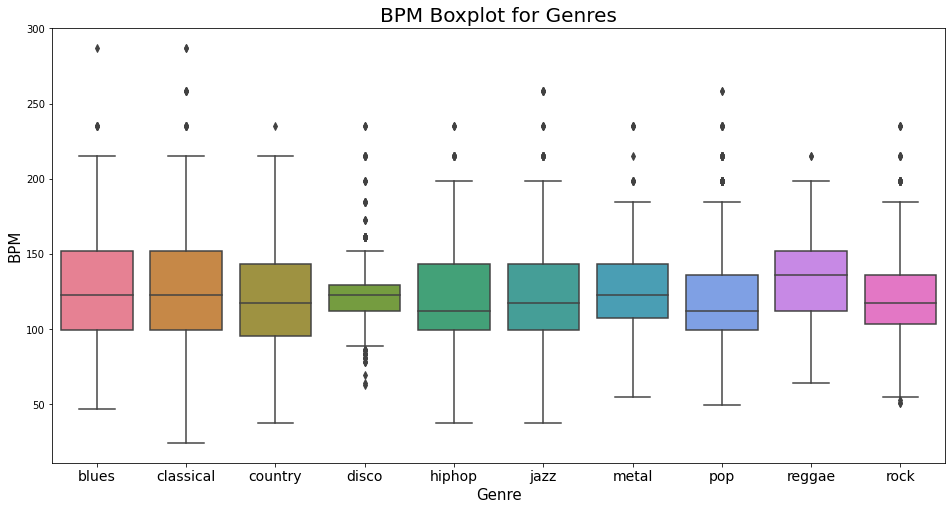

In [144]:


x = data[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(16, 8));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")



/home/brahim/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


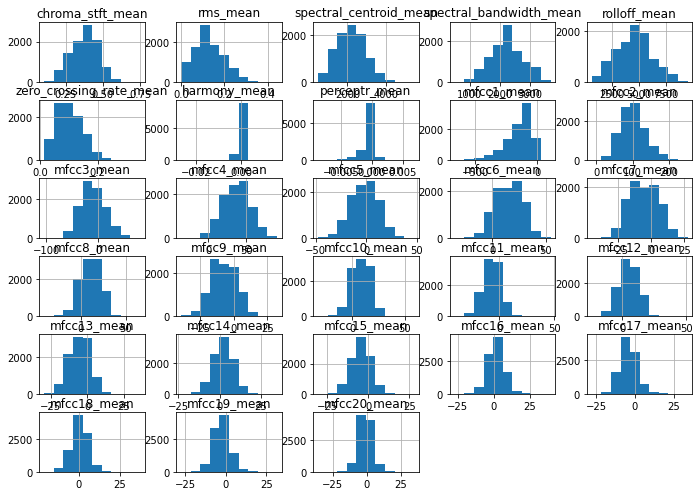

In [145]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
data[mean_cols].hist(ax = ax)
plt.savefig('histogram.png')
plt.show()

## Preparing the data

In [146]:
import sklearn.preprocessing as skp

In [147]:
#Droping the filename and length columns as they are irrelevant to the genre 
useful_data = data.drop(['filename','length'], axis = 1)

In [148]:
useful_data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [149]:
y = useful_data['label']
X = useful_data.drop(['label'], axis = 1)

In [150]:
useful_data.isna().sum().sum()

0

In [151]:
strdScaler = skp.StandardScaler()
DataPCA = strdScaler.fit_transform(X)

In [152]:
DataPCA

array([[-0.48780784,  0.64052047, -0.00662408, ..., -0.51356204,
         0.12841417, -0.29178072],
       [-0.40314187,  0.13183473, -0.26494432, ...,  1.01138445,
         1.27578001,  0.05642464],
       [-0.36169428,  0.7644909 ,  0.01669533, ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [-0.35433044,  0.42997426, -1.14464442, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.0883611 , -0.00630133, -0.93999575, ..., -0.72456977,
         0.30333409, -0.95893743],
       [-0.11321002,  0.19536324, -1.17205474, ..., -0.37245283,
        -0.47495901, -0.55112155]])

In [154]:
le = skp.LabelEncoder()

In [155]:
le.fit(y)

LabelEncoder()

In [156]:
le.classes_

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [157]:
y = le.transform(y)

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(DataPCA)

In [159]:
y = useful_data['label']

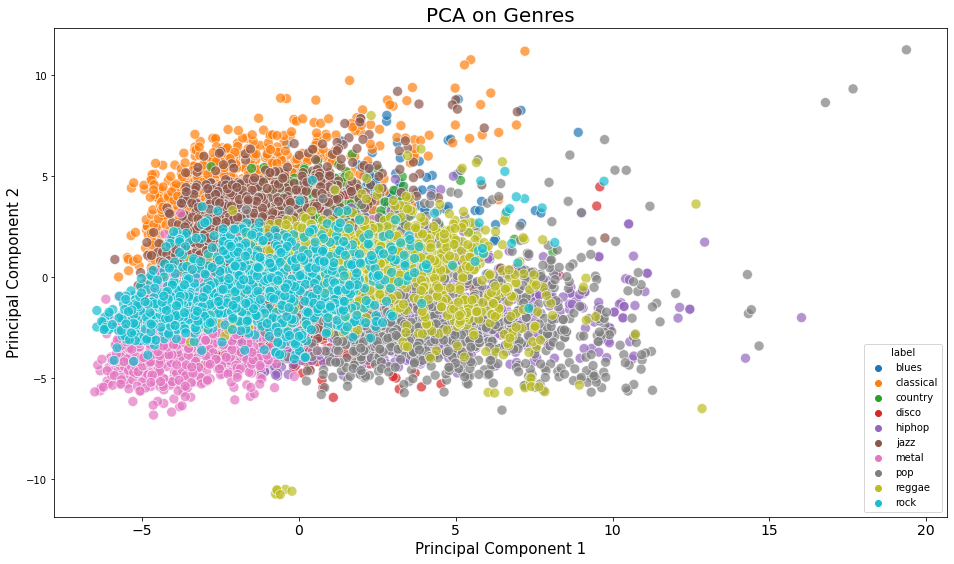

In [162]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, y], axis = 1)

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pc1", y = "pc2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA on Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA.png")
plt.show()


In [42]:
sum(pca.explained_variance_ratio_)

0.3359769718422832

The cumualtive explained variance isn't superior to 80%, therefore we can't rely only on 2 principal components

In [43]:
finalData

array([[-0.48780784,  0.64052047, -0.00662408, ..., -0.51356204,
         0.12841417, -0.29178072],
       [-0.40314187,  0.13183473, -0.26494432, ...,  1.01138445,
         1.27578001,  0.05642464],
       [-0.36169428,  0.7644909 ,  0.01669533, ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [-0.35433044,  0.42997426, -1.14464442, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.0883611 , -0.00630133, -0.93999575, ..., -0.72456977,
         0.30333409, -0.95893743],
       [-0.11321002,  0.19536324, -1.17205474, ..., -0.37245283,
        -0.47495901, -0.55112155]])

## Spliting data into test and train sets
we have to take 800 samples from each class and put it in the train set

In [169]:
cutoff = 800
labels = useful_data['label'].unique()
trainDF = pd.DataFrame()
testDF = pd.DataFrame()
for label in labels:
    dfoflabel = useful_data[useful_data['label'] == label]
    nrows = dfoflabel.shape[0]
    #appending the first 800 sample of each label to train set
    trainDF = trainDF.append(dfoflabel.head(cutoff))
    #appending the rest to test set
    testDF =testDF.append(dfoflabel.tail(nrows - cutoff))

In [170]:
df_Y_train = trainDF.pop('label')
df_X_train = trainDF

In [171]:
df_Y_test = testDF.pop('label')
df_X_test = testDF

In [173]:
sts = skp.StandardScaler()
le = skp.LabelEncoder()

X = sts.fit_transform(df_X_train)
Y = le.fit_transform(df_Y_train)
Xtest = sts.fit_transform(df_X_test)
Ytest = le.fit_transform(df_Y_test)


## Logistic regression

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
clf = LogisticRegression(random_state=0,max_iter = 10000).fit(X, Y)

In [180]:
clf.score(X,Y)

0.763625

In [181]:
clf.score(Xtest, Ytest)

0.5346733668341709

## KNeighborsClassifier

In [182]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=10)

In [183]:
neigh.score(X,Y)

0.91225

In [184]:
neigh.score(Xtest, Ytest)

0.4487437185929648

## Finding the best value for k

In [185]:
from sklearn.model_selection import GridSearchCV

In [187]:

grid_params = {
    'n_neighbors' : [3,5,7,9,11,19],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean',',manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 3, n_jobs = -1)
gs_results = gs.fit(X,Y)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   56.8s finished


In [194]:
print("the best score is {} and the best parameters are {}".format(gs_results.best_score_, gs_results.best_params_))

the best score is 0.5032469684725268 and the best parameters are {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


## LDA

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [64]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,Y)
print(clf.score(X,Y))
print(clf.score(Xtest,Ytest))

0.693125
0.4884422110552764


In [67]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,Y)
print(model.score(X,Y))
print(model.score(Xtest,Ytest))

0.869125
0.4035175879396985


## Keras deep learning classification

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [72]:
from sklearn.model_selection import GridSearchCV

In [195]:
X.shape

(8000, 57)

In [203]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [211]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [223]:
dummy_y = np_utils.to_categorical(Y)
estimator = KerasClassifier(build_fn=baseline_model, verbose=0)

Let's find the best values for epochs and batch size

In [225]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=estimator, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, dummy_y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.115997 using {'batch_size': 20, 'epochs': 10}


In [226]:
grid_result.best_estimator_.score(X,dummy_y)

0.9745000004768372

In [227]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(grid_result.best_estimator_, X, dummy_y, cv=kfold)
print("Average Accuracy and its std: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Average Accuracy and its std: 89.00% (1.16%)


In [229]:
def baseline_model2():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1],activation='relu'))
    model.add(Dense(64, activation='relu'))
    
    
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [230]:
estimator2 = KerasClassifier(build_fn=baseline_model2, verbose=0)

In [233]:
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid2 = GridSearchCV(estimator=estimator2, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result2 = grid2.fit(X, dummy_y)
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

Best: 0.116247 using {'batch_size': 10, 'epochs': 10}


In [234]:
kfold = KFold(n_splits=10, shuffle=True)
results2 = cross_val_score(grid_result2.best_estimator_, X, dummy_y, cv=kfold)
print("Average Accuracy and its std: %.2f%% (%.2f%%)" % (results2.mean()*100, results2.std()*100))

Average Accuracy and its std: 88.31% (1.63%)


## Saving the model

In [ ]:
grid_result.best_estimator_.model.save("model.h5")
print("Saved model to disk")